
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.




#### 1.  # 20
Competitive Analysis: Text scraping the data from social media and online posts, determining sentiment towards the company (Amazon), summarazing the data into useful business public opinion, implement business solutions based upon deciphered feedback.

After scraping the data, it is common to use a heirarchical clustering. This can be done with multiple methods of unsupervised learning. The data needed is all text scraped from various sources, after having been linked in some way to Amazon. Filtering out 'bad data' would be equally important as obtaining 'good data'. This system when properly implemented could allow the company to make marketing decisions affecting their reputation in real time with indirect, voluntary customer feedback. The value of this system would be enormous to the company marketing team.

#### 2.  # 15
Sales Forecasting: Predictive models for future prices are created using decision trees based upon a subset of the product's features. This is clearly a classification problem hidden in a prediction model. The data that would be needed would be information on features, which products have which features, the sales of the products, and the corresponding time stamps. With this data a reasonably accurate model could predict expected sales amounts.

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer


#### Work:
= $\prod_{i=1}^{n}\dfrac{1}{C\theta^5}t^4 * e ^\dfrac{-t}{\theta}$

= $ln\dfrac{\prod_{i=1}^{n}t^4}{C^N\theta^{5N}} * ln \prod_{i=1}^{n}e ^\dfrac{-t}{\theta}$

= $ln\dfrac{1}{C^N*\theta^{5N}}*\sum_{i=1}^{n}lnt^4 * \sum_{i=1}^{n} \dfrac{-t}{\theta}$

= $ln\dfrac{1}{C^N*\theta^{5N}}*\sum_{i=1}^{n}lnt^4 * \sum_{i=1}^{n} \dfrac{-t}{\theta}$

= $-Nln(C) - 5Nln(\theta) + 4\sum_{i=1}^{n}ln(t) + \sum_{i=1}^{n} \dfrac{-t}{\theta}$

#### Take the partial derivative with respect to theta, and set equal to zero:

$0 =  \dfrac {d}{d\theta}[-Nln(C) - 5Nln(\theta) + 4\sum_{i=1}^{n}ln(t) + \sum_{i=1}^{n} \dfrac{-t}{\theta}]$

$ 0 = \dfrac{-5N}{\theta} + \sum_{i=1}^{n} \dfrac{t}{\theta^2}$

$\theta = \sum_{i=1}^{n}\dfrac{t}{5N}$

#### Using the ten time parameters specified above, here is the solution:
$\theta = \dfrac {28.8}{50} $

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

## Answer

## Part A

In [2]:
# PART A

# Print the size of the data
print boston.data.shape
print "The size of the data frame is 506 entries with 13 attributes each.\n"

# Print the first 5 rows of the datafram
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df[:5]

(506, 13)
The size of the data frame is 506 entries with 13 attributes each.



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Part B

In [3]:
# PART B

# Create linear regression object and train with X and y
regr = linear_model.LinearRegression()
regr.fit(X, y)

# The coefficients and MSE
print "Coefficients are:\n" , regr.coef_
print "\nMSE =", round(mean_squared_error(y, regr.predict(X)), 3)

Coefficients are:
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]

MSE = 21.898


## Part C

In [4]:
# PART C

# Split the data into training/testing sets
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

# Create linear regression object and train the model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train, y_train)
y_hat = regr2.predict(X_test)

# The coefficients and MSE
print 'Coefficients:\n', regr2.coef_
print"\nMSE =", round(mean_squared_error(y_test, y_hat),3)

Coefficients:
[ -1.91246374e-01   4.42289967e-02   5.52207977e-02   1.71631351e+00
  -1.49957220e+01   4.88773025e+00   2.60921031e-03  -1.29480799e+00
   4.84787214e-01  -1.54006673e-02  -8.08795026e-01  -1.29230427e-03
  -5.17953791e-01]

MSE = 38.164


### Comparing MSE from B and C:
When creating the linear regression with the entire dataset and then testing on that dataset, we achieved a much lower MSE than when splitting the set as in part C. This could have been due to a couple different reasons.

1. The split was not completely random and thus may have skewed the regression model, which would have yielded a higher MSE when using the model on the test set.

2. The first regression done on the entire set, tested only on itself. This should be a better fit for our model, but this method risks overfitting, which in turn could have a lower MSE when it is not as good of fit.

## Part D

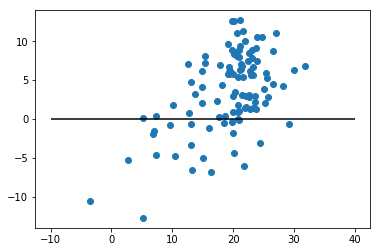

In [5]:
# PART D

plt.scatter(y_hat, y_hat - y_test)
plt.hlines(y=0, xmin = -10, xmax = 40)
plt.show()

### Is the model reasonable?

The residual plot shows a mostly random distribution of points above and below the zero line, so it looks like linear regression can be an accurate and fairly unbiased fit. There tends to be some clumping of points in the upper right portion of the graph, so there my be some bias in the results. However, overall this model appears to be a reasonable fit.

## Part E

In [6]:
X = np.concatenate((X, np.square(X)), axis=1)

In [7]:
# PART E

# Split the data into training/testing sets
X_train = X[:400]
X_test = X[400:]

# Create linear regression object and train the model
regr3 = linear_model.LinearRegression()
regr3.fit(X_train, y_train)
y_hat = regr3.predict(X_test)

# The coefficients and MSE
print 'Coefficients:\n', regr3.coef_
print"\nMSE =", round(mean_squared_error(y_test, y_hat),3)

Coefficients:
[ -6.28564029e-01  -4.69283413e-02   1.35998008e-01   1.12670520e+00
  -3.89085940e+01  -1.71470367e+01  -1.92714017e-02  -2.49211073e+00
   6.85468872e-01  -1.10900553e-01  -6.25152381e+00   4.25358263e-02
  -1.43915460e+00   5.03672853e-03   5.35234383e-04  -4.91394588e-03
   1.12670516e+00   1.11228197e+01   1.61544902e+00   2.97952872e-04
   1.37189224e-01  -3.37949389e-02   1.47365245e-04   1.54711150e-01
  -7.67778717e-05   2.70068424e-02]

MSE = 32.947


# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



In [9]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Part 1

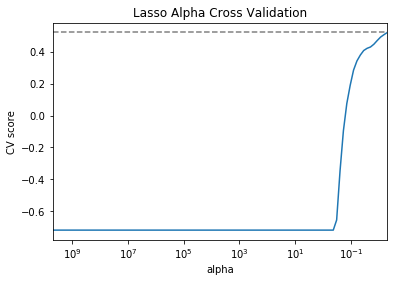

Lasso Best Lambda = 0.005


In [21]:
# Part 1(a): Lasso Best Lambda

lasso = Lasso(random_state=0, normalize = True)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X, y)
lasso_scores = clf.cv_results_['mean_test_score']

plt.semilogx(alphas, lasso_scores)
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.title('Lasso Alpha Cross Validation')
plt.axhline(np.max(lasso_scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

best_alpha_lasso = alphas[lasso_scores.argmax()]
print "Lasso Best Lambda =", round(best_alpha_lasso,3)

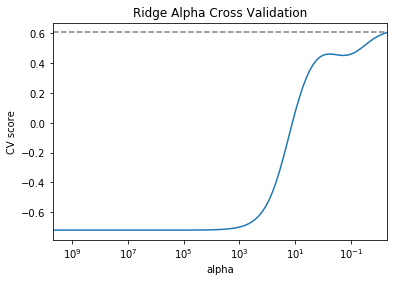

Ridge Best Lambda = 0.005


In [20]:
# Part 1(b): Ridge Best Lambda

ridge = Ridge(random_state=0, normalize = True)

crdg = GridSearchCV(ridge, tuned_parameters, cv=n_folds)
crdg.fit(X, y)
ridge_scores = crdg.cv_results_['mean_test_score']

plt.semilogx(alphas, ridge_scores)
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.title('Ridge Alpha Cross Validation')
plt.axhline(np.max(ridge_scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

best_alpha_ridge = alphas[ridge_scores.argmax()]
print "Ridge Best Lambda =", round(best_alpha_ridge,3)

## Part 2

/Users/brettscroggins/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


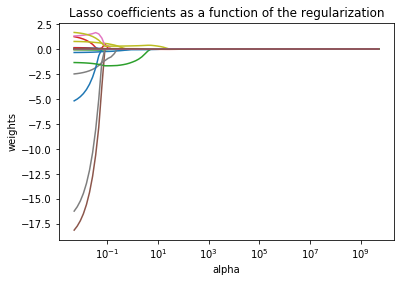

In [12]:
# Part 2(a): Lasso Lambda Selection

# Creating the Lasso model:
lasso = Lasso(random_state=0)
coeffs = []

# Train the model with different regularisation strengths:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coeffs.append(lasso.coef_)

# Plotting the results for ridge:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

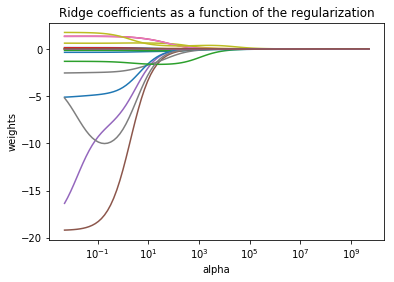

In [13]:
# Part 2(b): Ridge Lambda Selection

# Creating the Ridge model:
ridge = Ridge(random_state=0)
coefs = []

# Train the model with different regularisation strengths:
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Plotting the results for ridge:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Part 3

In [14]:
# Part 3(a): Least Squares Regression

leastsqr = linear_model.LinearRegression()
leastsqr.fit(X_train, y_train)

print "Least Squares MSE =", round(mean_squared_error(y_test, leastsqr.predict(X_test)),3)

Least Squares MSE = 17.298


In [15]:
# Part 3(b): Lasso Regression

lasso = Lasso(random_state=0, alpha = best_alpha_lasso, normalize = True)
lasso_fit = lasso.fit(X_train, y_train)

lasso_y_hat = lasso_fit.predict(X_test)
print "Lasso MSE =", round(mean_squared_error(y_test, lasso_y_hat),3)

Lasso MSE = 22.857


In [16]:
# Part 3(c): Ridge Regression

ridge = Ridge(random_state=0, alpha = best_alpha_ridge, normalize = True)
ridge_fit = ridge.fit(X_train, y_train)

ridge_y_hat = ridge_fit.predict(X_test)
print "Ridge MSE =", round(mean_squared_error(y_test, ridge_y_hat),3)

Ridge MSE = 18.68


### Write-Up:
The least square model gave the lowest mean squared error (MSE) at 17.298 and therefore is the most accurate model for prediction for this specific case. Prior to running the Lasso and Ridge regressions to best avoid variance in units and variables, we decided to normalize the data to get a more appropriate fit. The Lasso regression with a best lambda of 1.005 gave a similar MSE to the Ridge regresion with its best lambda of 814.875 yeilding MSE's of 23.414 and 23.515 respectively.

## Part 4

In [17]:
# Part 4: Lasso Cross Validation

lassocv = LassoCV(alphas=None, cv=10, max_iter=10000, normalize = True).fit(X_train, y_train)
best_lassocv_alpha = lassocv.alpha_
print "The best lambda value for Lasso cross validation is:\n", round(best_lassocv_alpha,5)

best_lasso = Lasso(random_state=0, alpha=best_lassocv_alpha).fit(X_train,y_train)
print "\nCoefficients matrix for the Lasso Cross Validation: \n", best_lasso.coef_

predict_lasso = best_lasso.predict(X_test)
cv_errors = mean_squared_error(predict_lasso,y_test)
print'\nMean squared error for the lasso model using best lambda found via cross validation is:\n', round(cv_errors,3)

The best lambda value for Lasso cross validation is:
0.00094

Coefficients matrix for the Lasso Cross Validation: 
[ -2.29932177e-01  -3.65285730e-02   1.44418536e-01   0.00000000e+00
  -2.06592899e-02  -1.79941776e+01   4.40868190e-03  -2.74415362e+00
   6.12055320e-01  -3.16006931e-02  -5.67129047e+00   9.55181586e-03
  -1.32998473e+00   1.13349330e-03   4.81600831e-04  -2.96806266e-03
   1.74317835e+00  -1.82629504e+01   1.67875058e+00  -1.74724501e-05
   1.73278180e-01  -1.40003121e-02   2.34227098e-05   1.40750624e-01
  -8.54468971e-06   2.29337291e-02]

Mean squared error for the lasso model using best lambda found via cross validation is:
17.43


### Observations from above:

When the model was not normalized, the results were drastically different. That was the first major observation found. Using the normalized model, based on the given coefficients it is clear that all but one variable is valuable in the predictive model. Though not all variables are equal in weight, only one is fully brought to zero.      
       
There is a spread of six orders of magnitude on the coefficients, with the strongest being a value of magnitude 17.84; while the weakest non-zero coefficient is on the magnitude of .0000078. It is worth noting that all of the concatenated variable coefficients are generally lower than the original variable coefficients.

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.


## Answer:

Interaction terms create a level of dependence between terms. This would not be a better model in any instance in which there is independence between variables. Additionally, a simpler model without interaction terms would be much easier to explain. Anytime a high degree of explainability and interpretability for a model is desired, interaction terms would not be preferred over the less 'powerful' model.